<a href="https://colab.research.google.com/github/CodeHombre/Deep-Learning-Projects/blob/main/Mnist_DNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torchvision
from torchvision import transforms,datasets

train = datasets.MNIST('', train=True, download=True, transform=transforms.Compose([transforms.ToTensor()]))
test = datasets.MNIST('', train=False, download=True, transform=transforms.Compose([transforms.ToTensor()]))

trainset = torch.utils.data.DataLoader(train, batch_size=20, shuffle=True)
testset = torch.utils.data.DataLoader(test, batch_size=20, shuffle=False)

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
  def __init__(self):
    super().__init__()
    self.fc1 = nn.Linear(28*28, 64)
    self.fc2 = nn.Linear(64, 64)
    self.fc3 = nn.Linear(64, 64)
    self.fc4 = nn.Linear(64, 10)
  
  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = F.relu(self.fc3(x))
    x = self.fc4(x)

    return F.log_softmax(x, dim=1)

net = Net()
print(net)

Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


In [ ]:
X = torch.rand(28,28)
X = X.view(1,28*28)

In [ ]:
output = net(X)
output

tensor([[-2.4292, -2.3488, -2.2801, -2.1219, -2.2492, -2.3373, -2.3554, -2.2210,
         -2.3248, -2.3958]], grad_fn=<LogSoftmaxBackward>)

In [ ]:
import torch.optim as optim

optimizer = optim.Adam(net.parameters(), lr=0.001)

EPOCHS = 10

for epoch in range(EPOCHS):
  for data in trainset:
    X,y = data
    net.zero_grad()
    output = net(X.view(-1, 28*28))
    loss = F.nll_loss(output, y)
    loss.backward()
    optimizer.step()
  print(loss)

In [ ]:
correct =0
total=0

with torch.no_grad():
  for data in trainset:
    X,y=data
    output=net(X.view(-1,28*28))
    for idx,i in enumerate(output):
      if torch.argmax(i) == y[idx]:
        correct += 1
      total += 1

print("Accuracy = ", round(correct/total,3))

Accuracy =  0.988


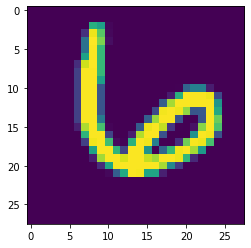

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(X[3].view(28,28))
plt.show()

In [ ]:
print(torch.argmax(net(X[3].view(-1,28*28))[0]))

tensor(6)
